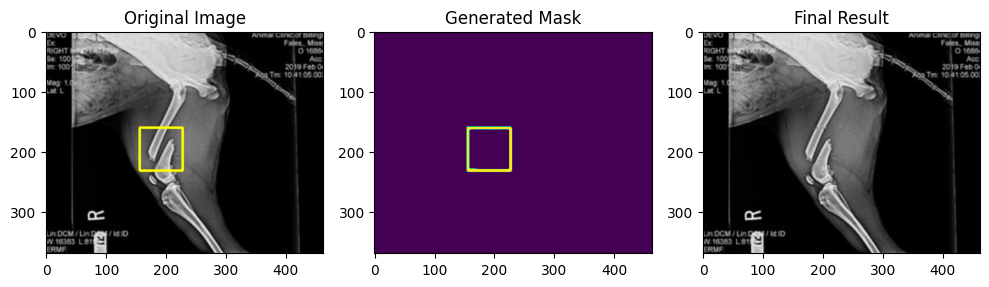

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/01- Picture1.png


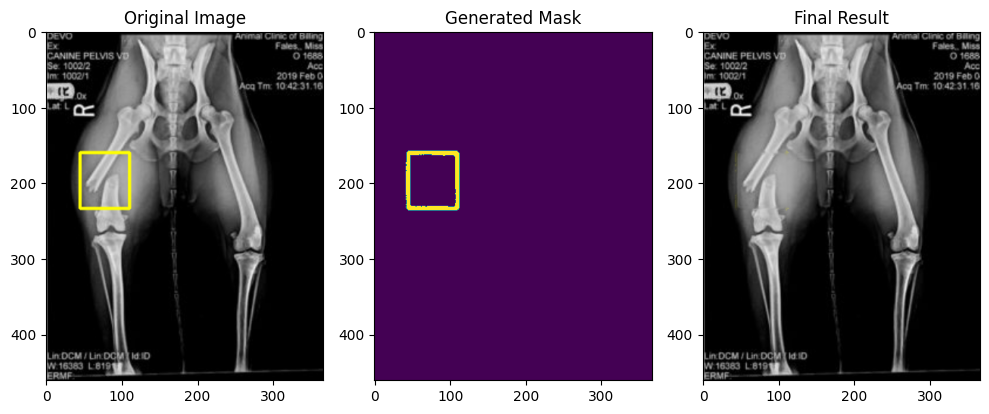

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/02- Picture2.png


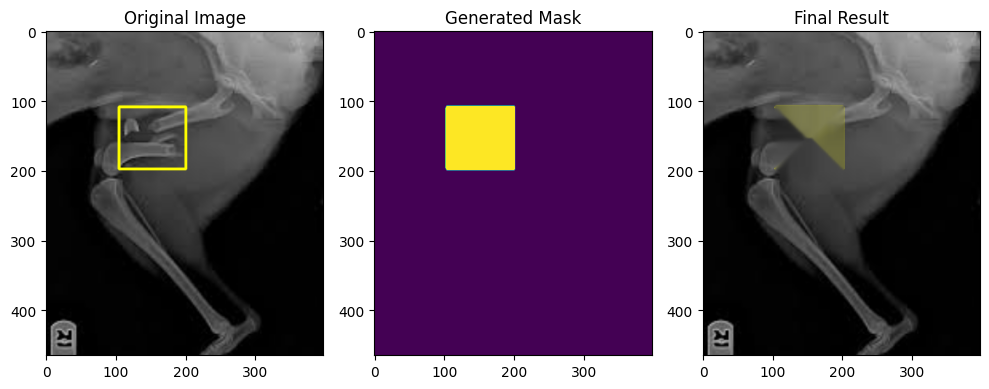

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/03- Picture3.png


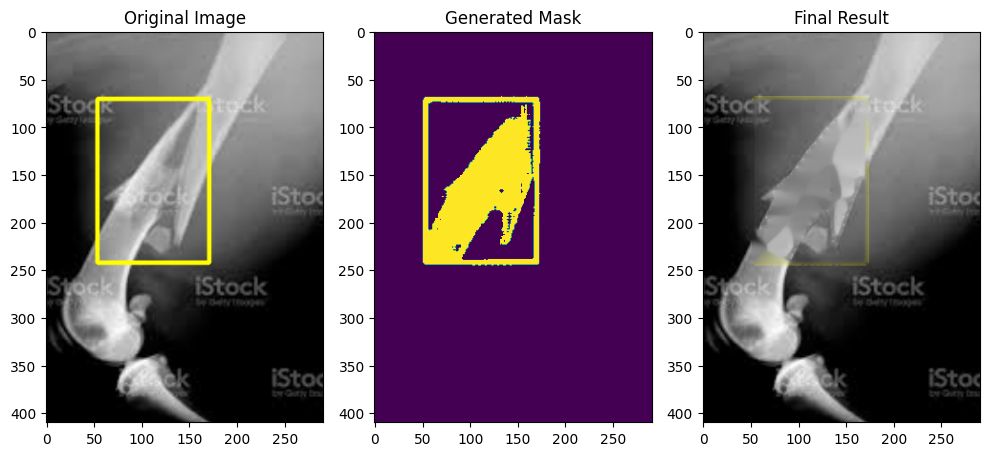

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/04- Picture4.png


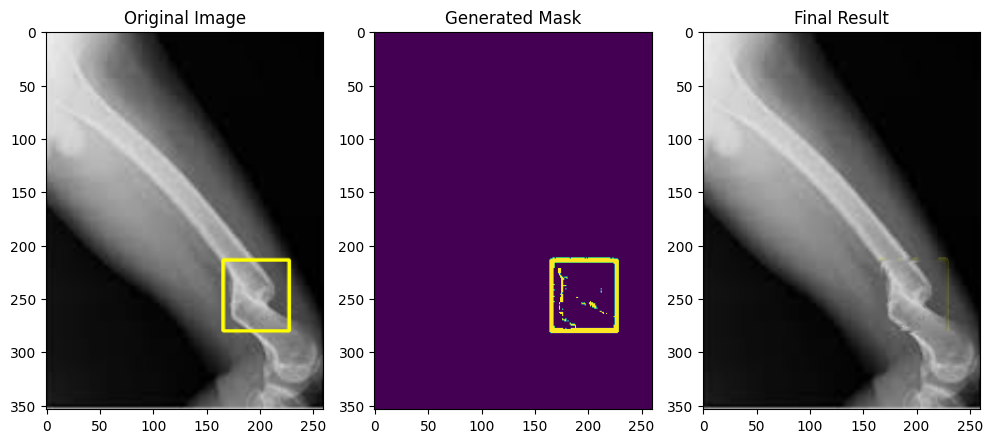

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/05- Picture5.png


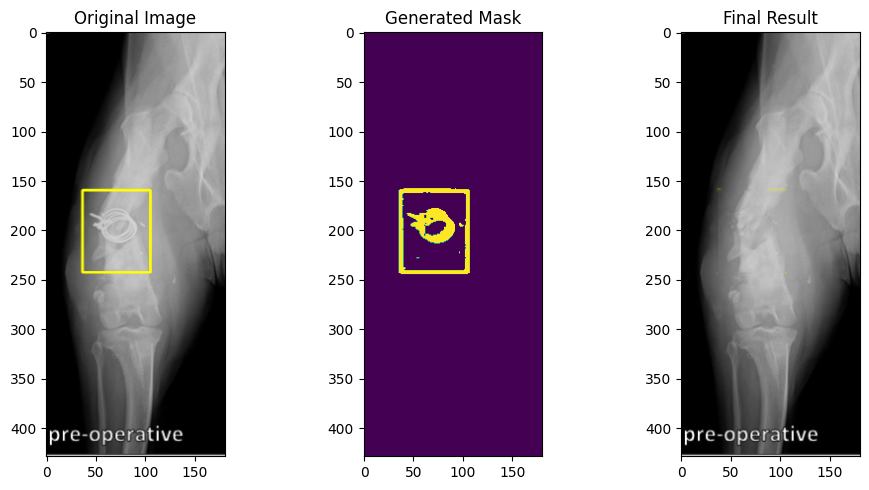

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/06- Picture6.1.png


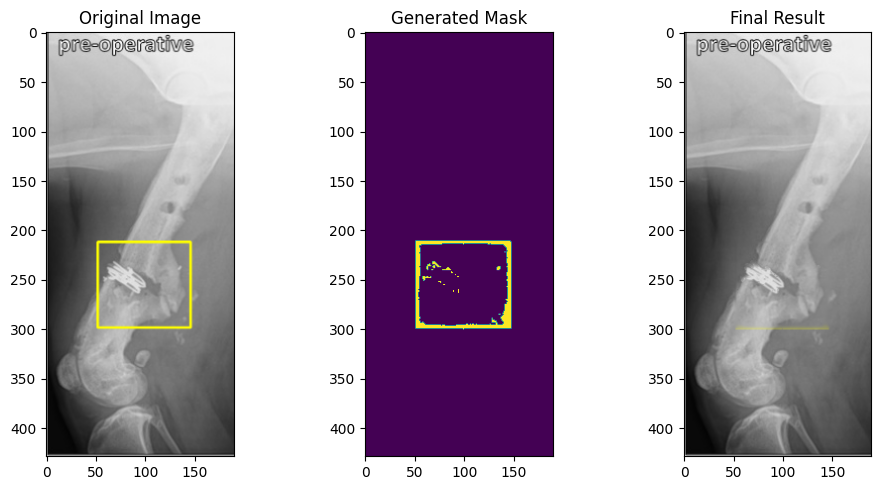

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/06- Picture6.2.png


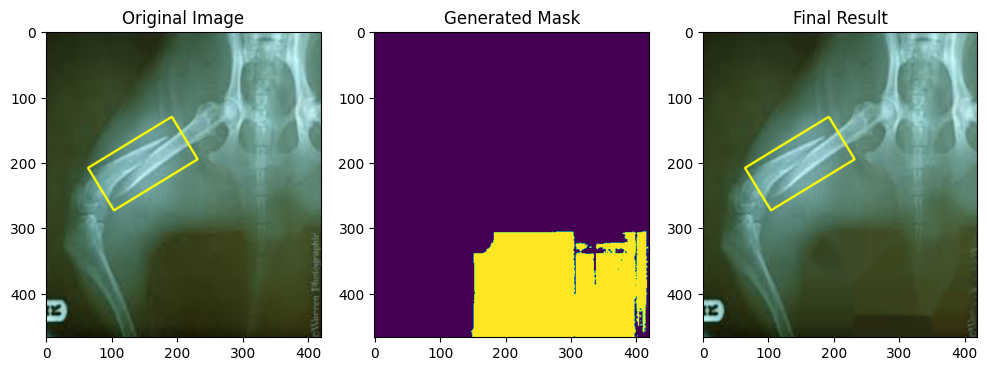

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/07- Picture7.png


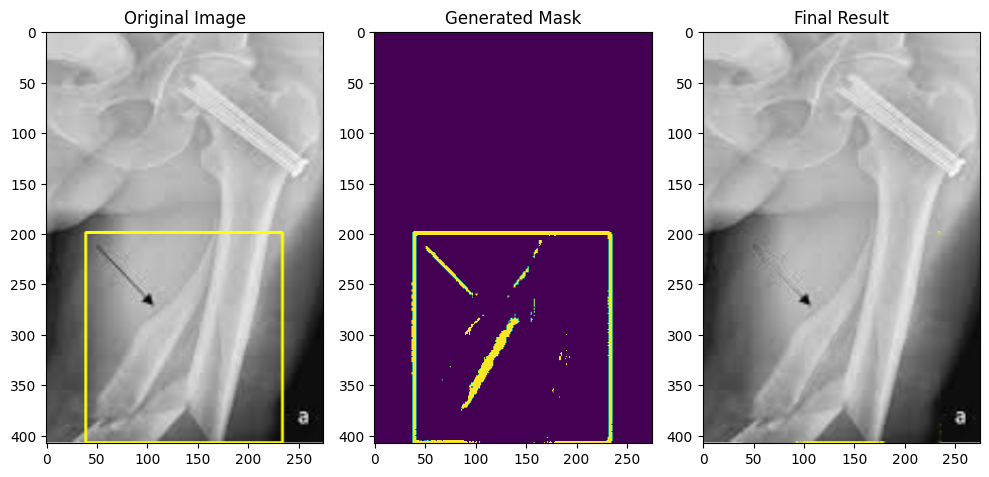

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/08- Picture8.1.png


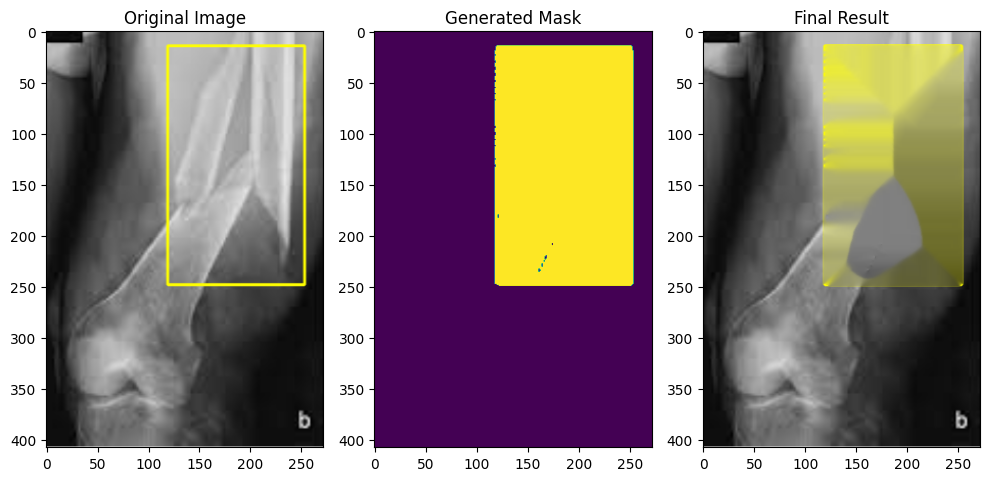

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/08- Picture8.png


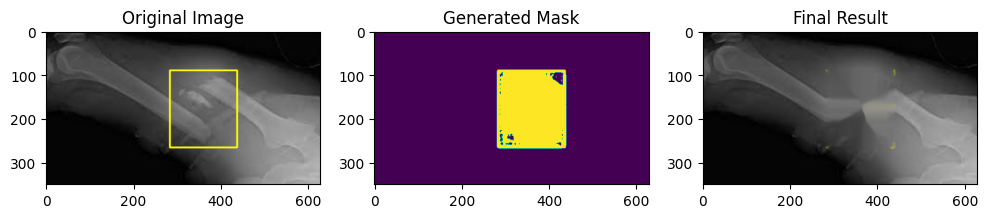

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/09- Picture9.png


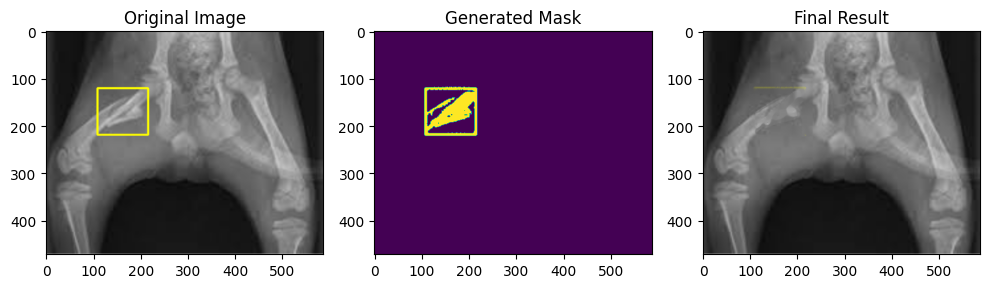

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/11- Picture11.png


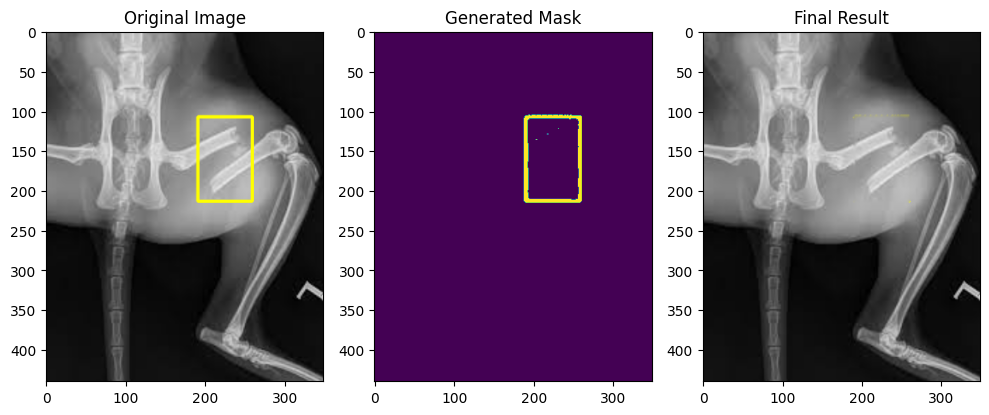

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/12- Picture12.png


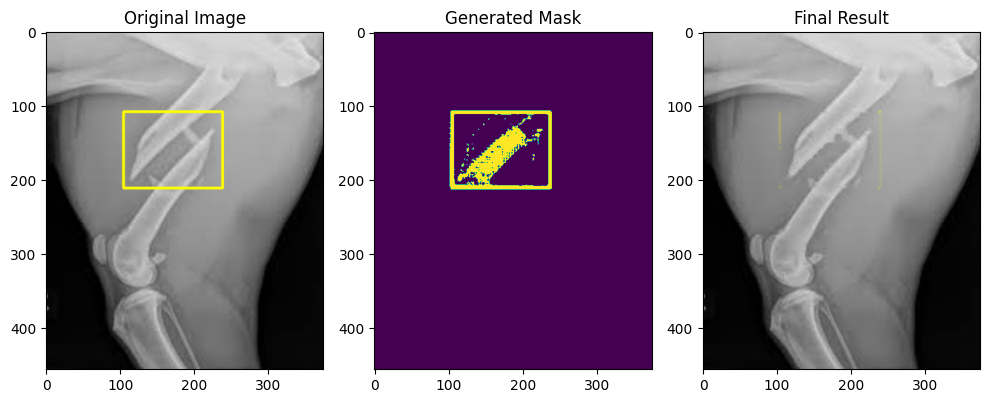

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/13- Picture13.png


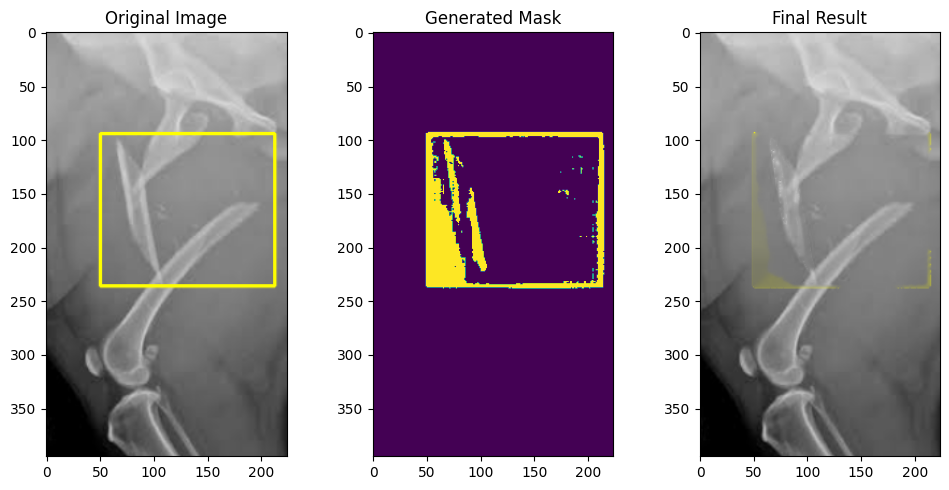

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/14- Picture14.png


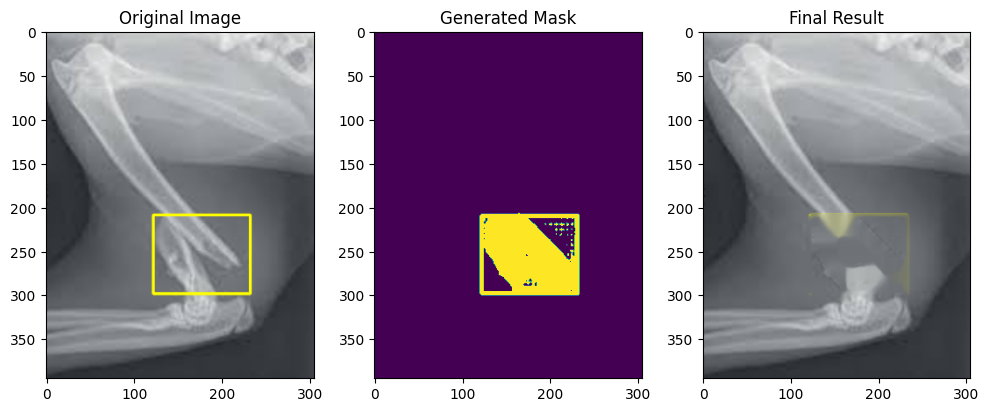

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/15- Picture15.png


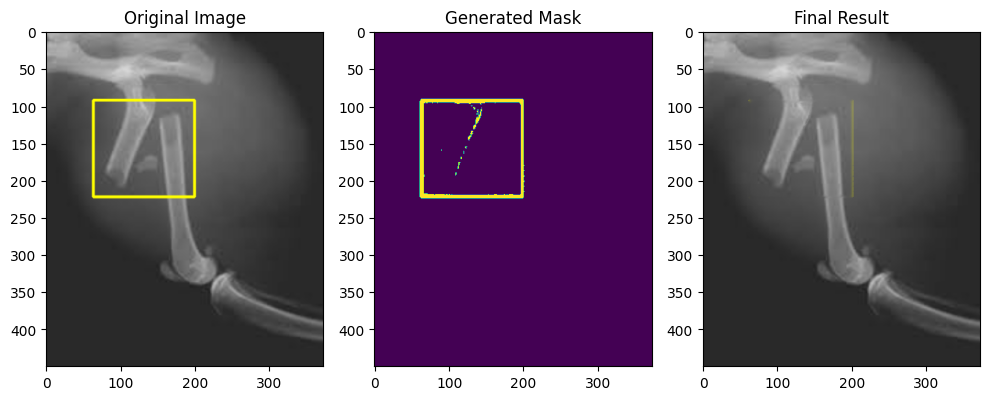

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/16- Picture16.png


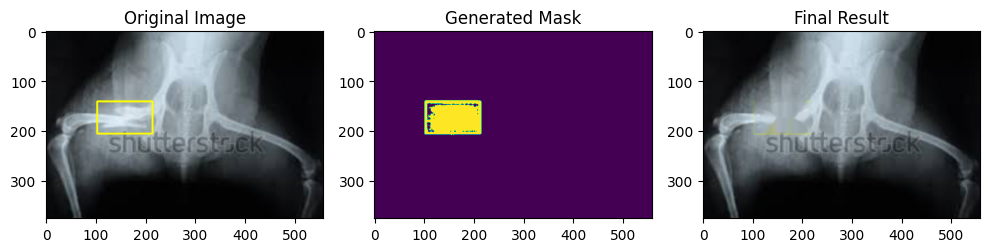

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/17- Picture17.png


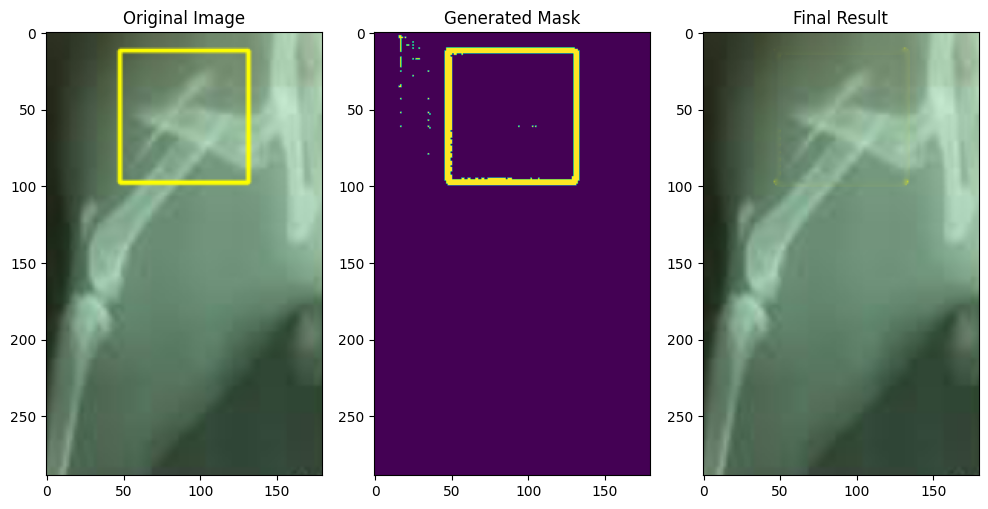

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/18- Picture18 .png


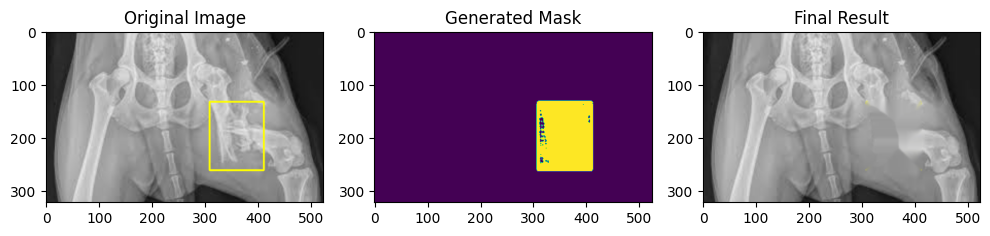

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/19- Picture19.png


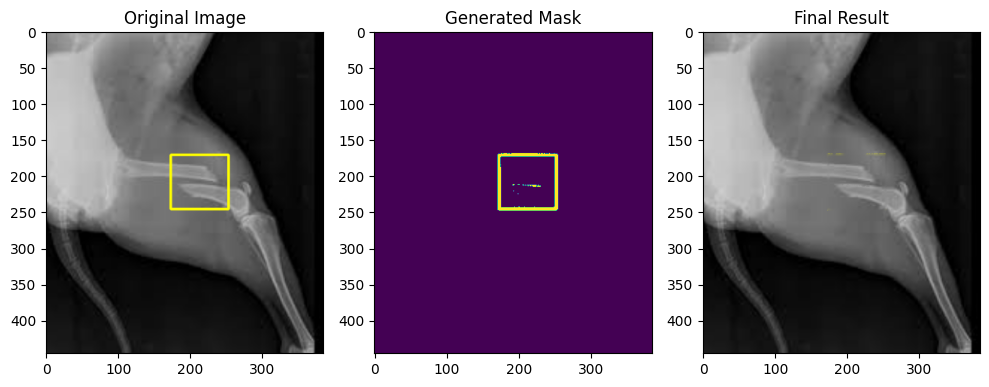

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/20- Picture20.png


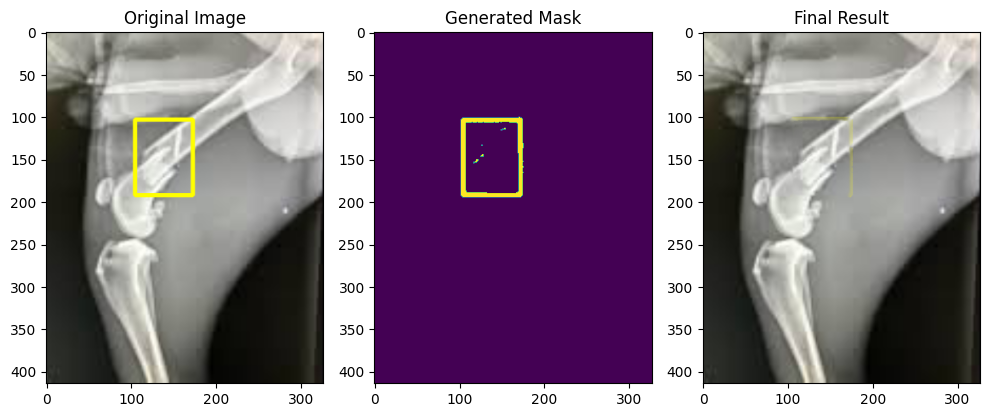

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/21- Picture21.png


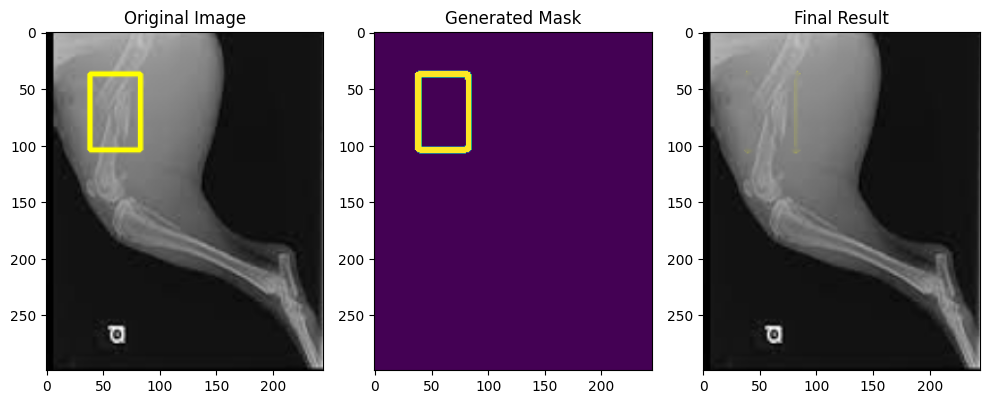

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/22- Picture22.1.png


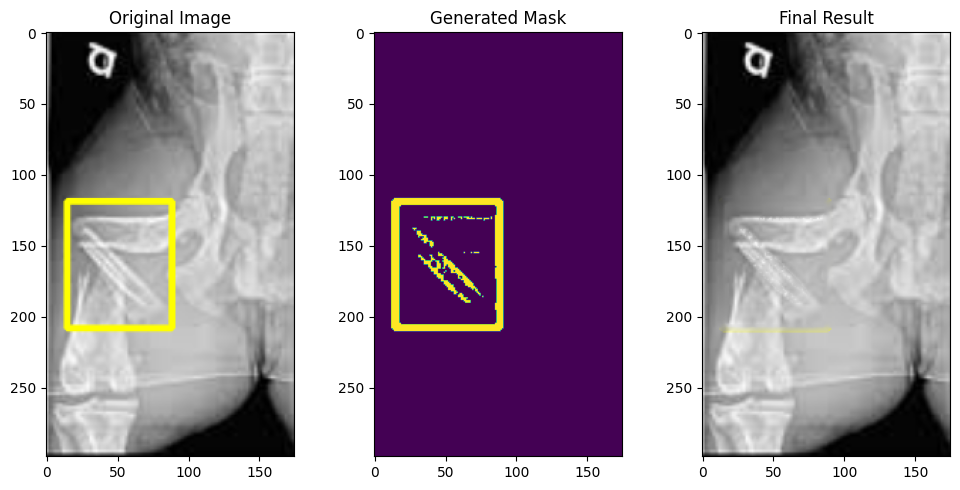

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/22- Picture22.png


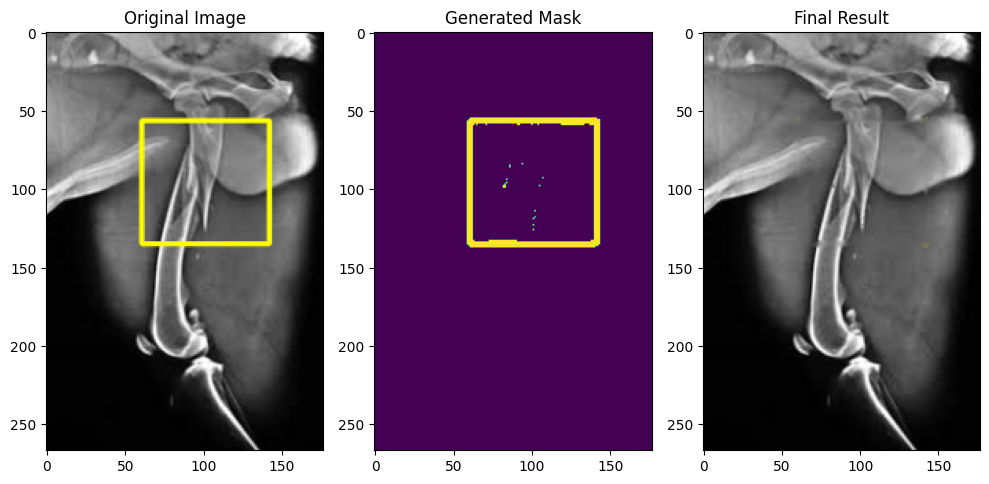

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/23- Picture23.1.png


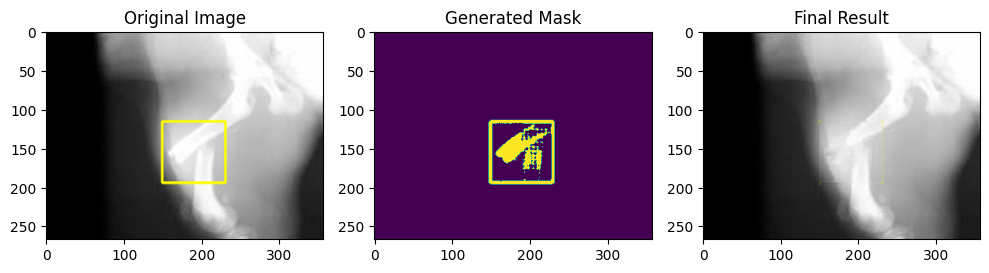

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/23- Picture23.png


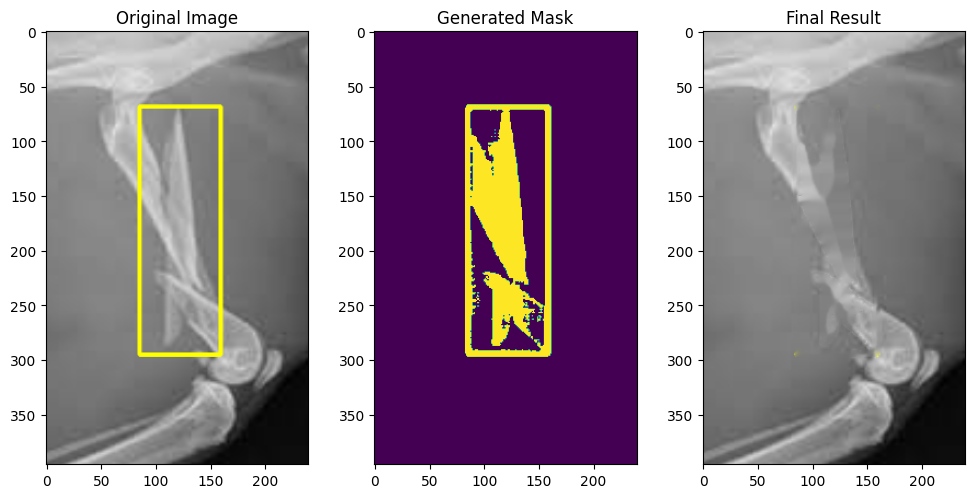

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/24- Picture24.png


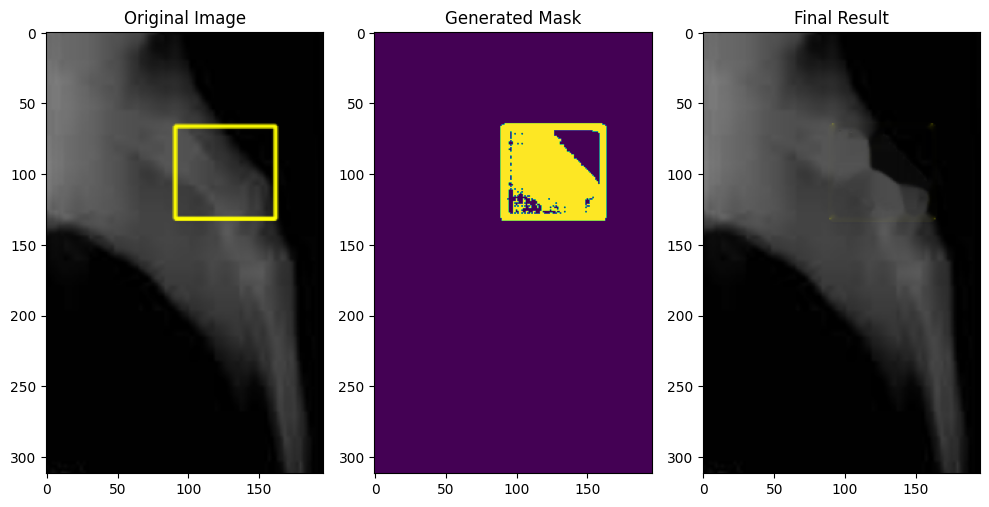

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/25 Picture 25.png


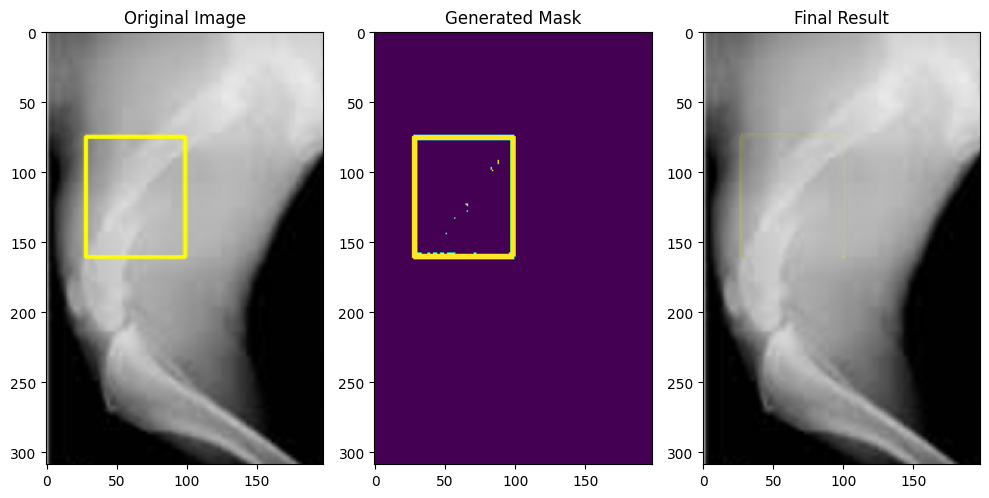

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/Dogs Femur Fracture/Overriding/26-Picture 26.png


In [ ]:
import os
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from segment_anything import SamPredictor, sam_model_registry

def debug_show(mask, image, bbox,result_image):
    """Visualization helper"""
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.title("Original Image")
    
    plt.subplot(1,3,2)
    plt.imshow(mask)
    plt.title("Generated Mask")
    
    plt.subplot(1,3,3)
    plt.imshow(cv2.rectangle(image.copy(), 
                            (bbox[0], bbox[1]),
                            (bbox[2], bbox[3]),
                            (255,0,0), 2))
    plt.title("Target Bounding Box")
    # Final Result After Removal
    plt.subplot(1,3,3)
    plt.imshow(result_image)
    plt.title("Final Result")
    
    plt.tight_layout()
    plt.show()

def detect_and_remove_yellow_box(image_path, output_path):
    # Load image properly with alpha channels
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    original = image.copy()
    
    # Improved HSV thresholding for yellow
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([22, 100, 100])
    upper_yellow = np.array([40, 255, 255])
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    
    # Morphological operations to clean mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Find largest contour with area check
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print("No yellow objects detected")
        return
    
    largest_contour = max(contours, key=cv2.contourArea)
    if cv2.contourArea(largest_contour) < 100:
        print("Yellow area too small")
        return
    
    # Get bounding box in SAM format (x_min, y_min, x_max, y_max)
    x, y, w, h = cv2.boundingRect(largest_contour)
    sam_box = np.array([x, y, x + w, y + h])
    
    # Initialize SAM with automatic device detection
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model_type = "vit_l"  # Switch to "vit_b" for faster processing
    checkpoint = SAM_CHECKPOINT
    
    sam = sam_model_registry[model_type](checkpoint=checkpoint)
    sam.to(device)
    
    predictor = SamPredictor(sam)
    predictor.set_image(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Generate mask with SAM
    masks, scores, _ = predictor.predict(
        box=sam_box[None, :],
        multimask_output=False
    )
    
    if masks.size == 0:
        print("No masks generated")
        return
    
    # Select best mask
    best_mask = masks[0].astype(np.uint8) * 255
    segmented_preview = cv2.bitwise_and(image, image, mask=best_mask)
    # Debug visualization
    
    # Verify mask validity
    if np.sum(best_mask) < 100:
        print("Invalid mask generated")
        return
    
    # Improved inpainting with dynamic radius
    radius = max(3, int(min(w,h)*0.1))
    inpainted = cv2.inpaint(image, best_mask, radius, cv2.INPAINT_NS)
    debug_show(best_mask, cv2.cvtColor(image, cv2.COLOR_BGR2RGB), sam_box,cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB))
    
    # Save result
    cv2.imwrite(output_path, inpainted)
    print(f"Successfully processed {image_path}")

if __name__ == "__main__":
    Base_Folder = 'D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/' 
    
    
    # for oblique images
    Oblique_INPUT_FOLDER = f'{Base_Folder}00- The DataSet/00- Dogs Femur Fracture/Oblique/'
    Oblique_OUTPUT_FOLDER = f'{Base_Folder}00- The DataSet/Segmented_DataSet/Oblique/'
    #### # for oblique images
    Overriding_INPUT_FOLDER = f'{Base_Folder}00- The DataSet/00- Dogs Femur Fracture/Overriding/'
    Overriding_OUTPUT_FOLDER = f'{Base_Folder}00- The DataSet/Segmented_DataSet/Overriding/'
    
    os.makedirs(Oblique_OUTPUT_FOLDER, exist_ok=True)
    os.makedirs(Overriding_OUTPUT_FOLDER, exist_ok=True)
    
    SAM_CHECKPOINT = f'{Base_Folder}01- Segmentation/sam_vit_l_0b3195.pth'
    for i in range(0,2):
        input_folder = Oblique_INPUT_FOLDER if i==0 else Overriding_INPUT_FOLDER
        output_folder = Oblique_OUTPUT_FOLDER if i==0 else Overriding_OUTPUT_FOLDER
        for file in os.listdir(input_folder):
            if file.endswith(".png"):
                detect_and_remove_yellow_box(input_folder + file, output_folder + file)

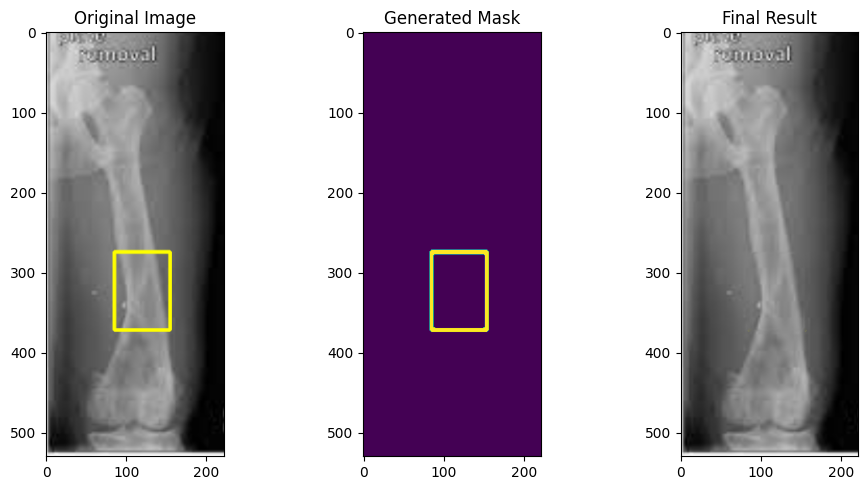

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Oblique/01- Picture1.png


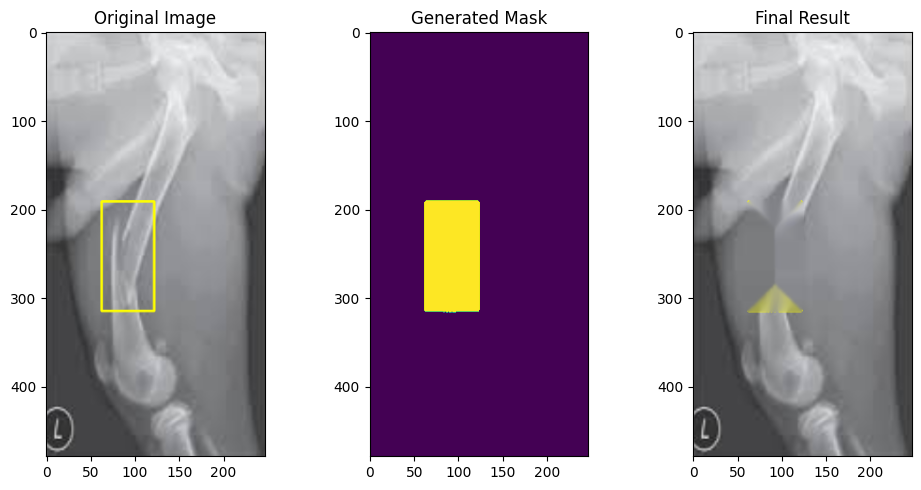

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Oblique/02- Picture2.1.png


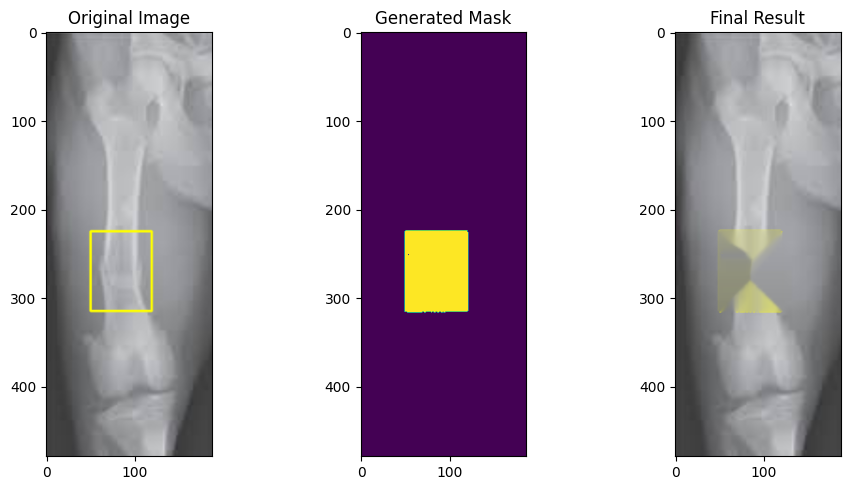

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Oblique/02- Picture2.2.png


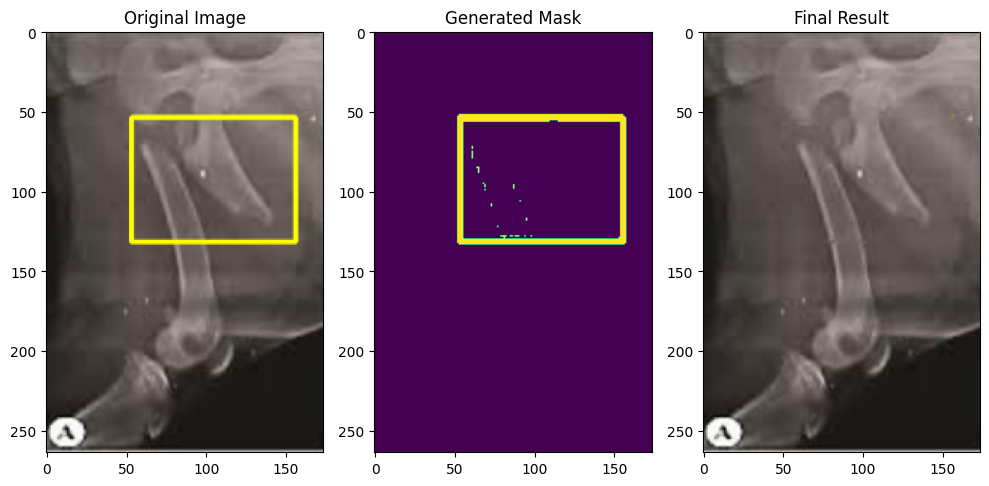

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Oblique/03- Picture3.png


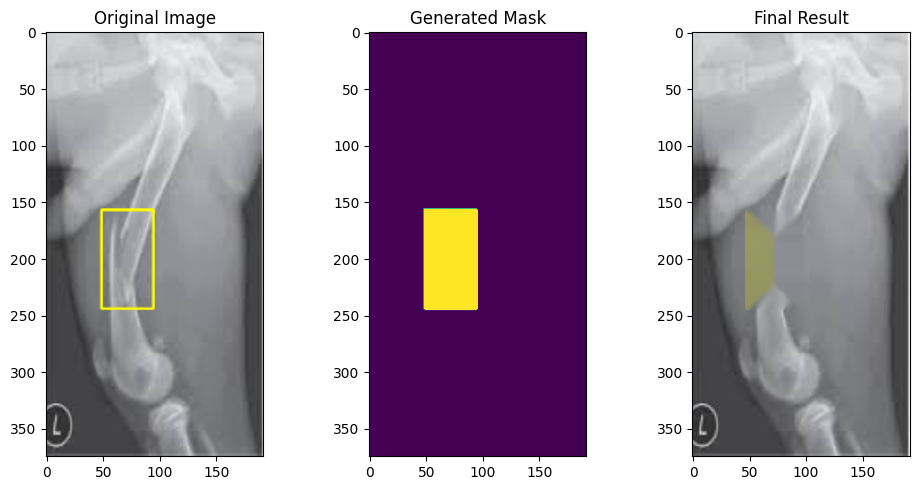

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Oblique/04- Picture4.1.png


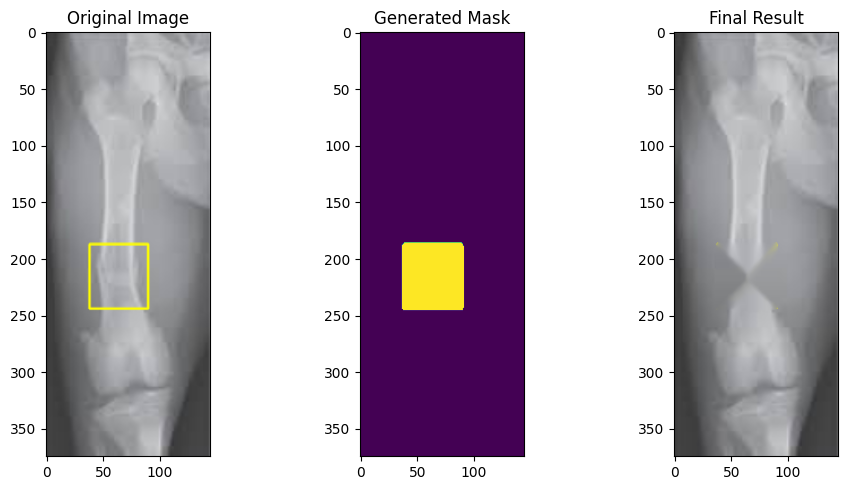

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Oblique/04- Picture4.2.png


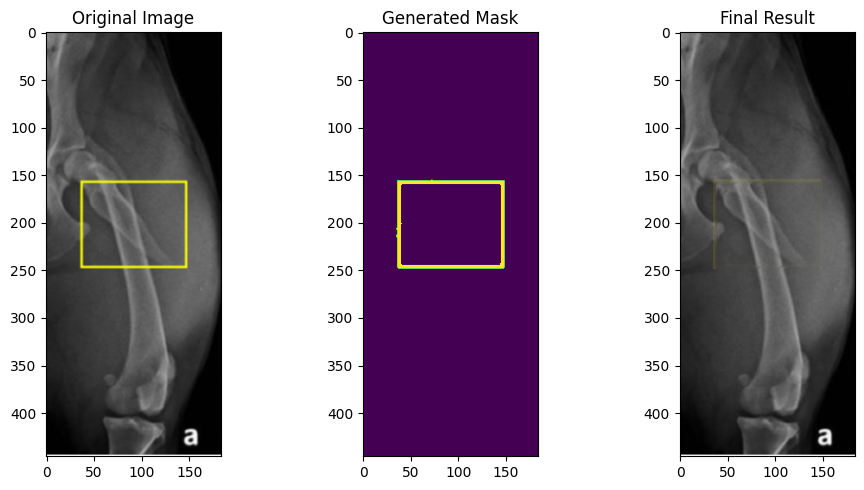

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Oblique/05- Picture5.1.png


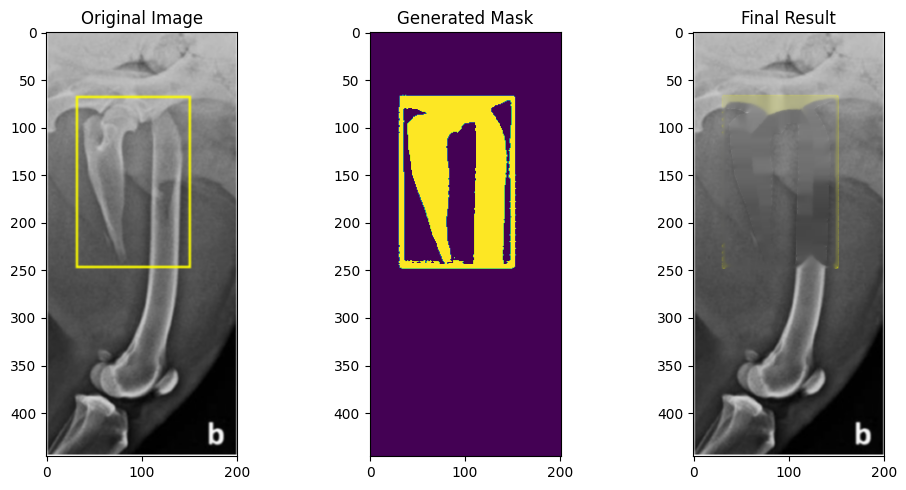

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Oblique/05- Picture5.2.png


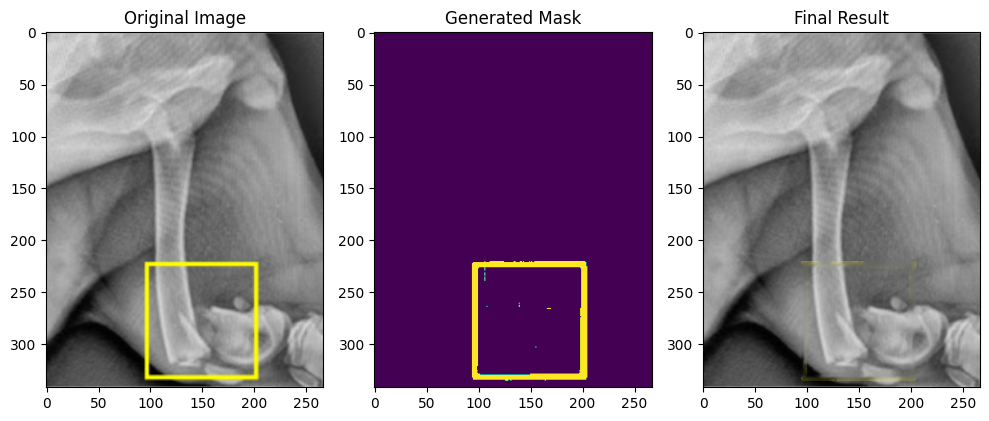

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Oblique/06- Picture6.1.png


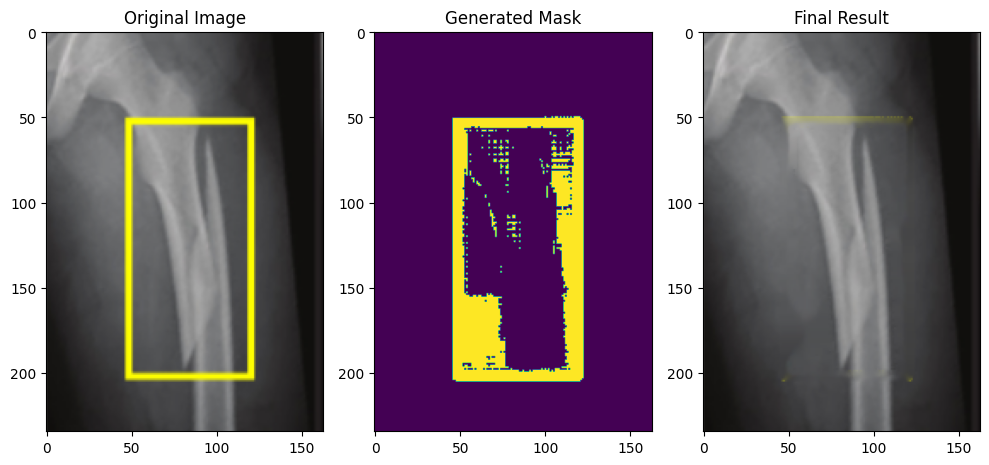

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Oblique/06- Picture6.2.png


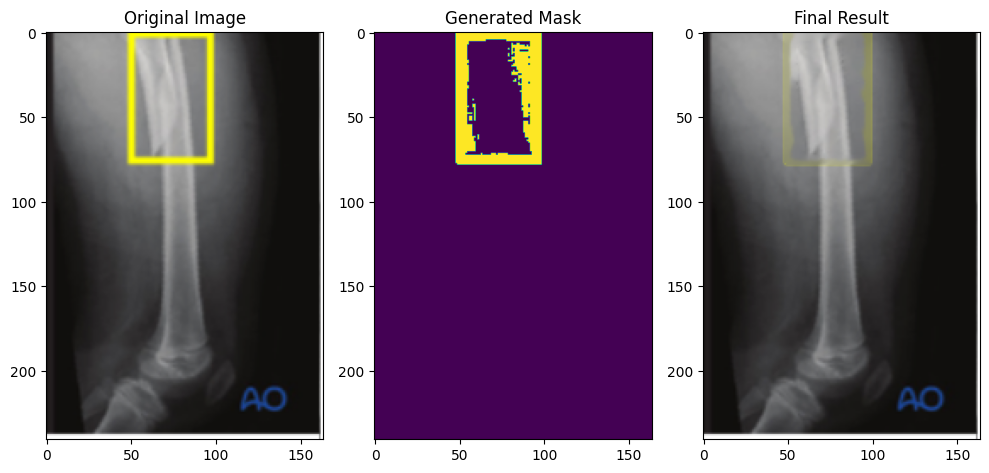

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Oblique/06- Picture6.png


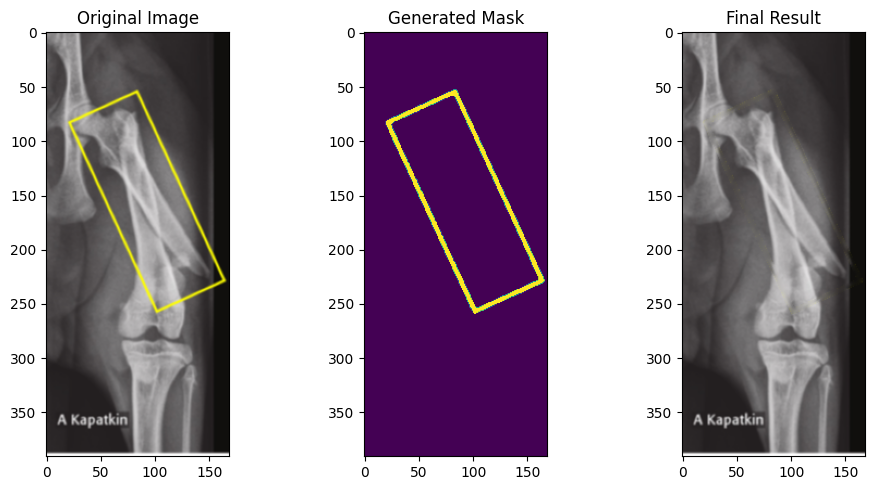

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Oblique/07- Picture7.1.png


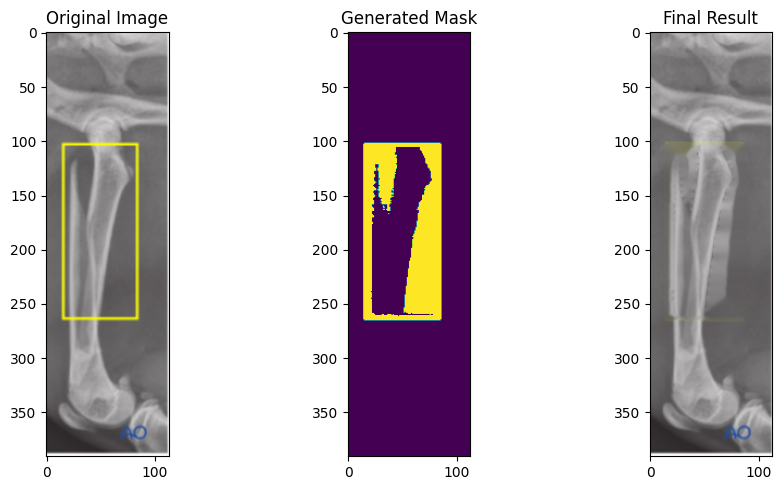

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Oblique/07- Picture7.2.png


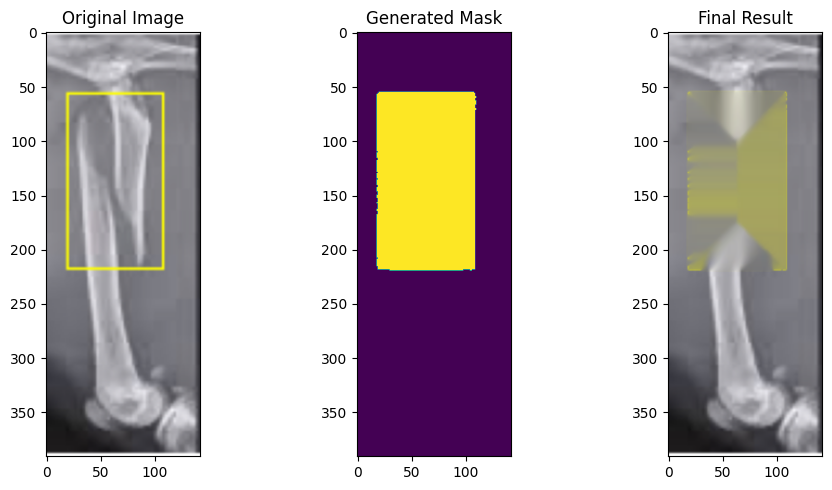

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Oblique/07- Picture7.3.png


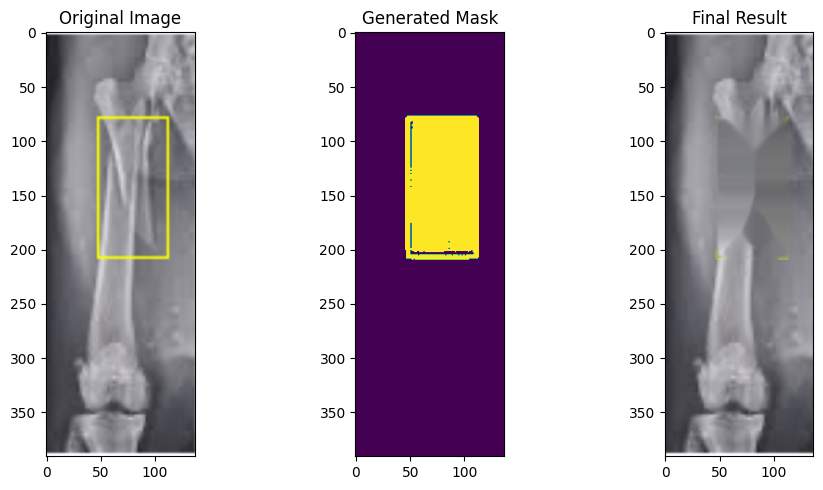

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Oblique/07- Picture7.4.png


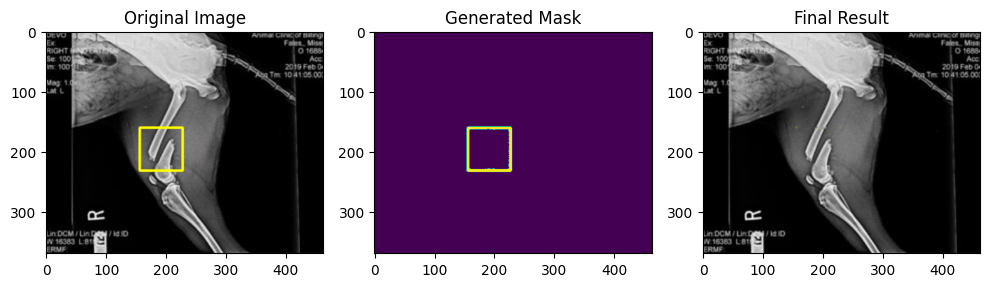

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/01- Picture1.png


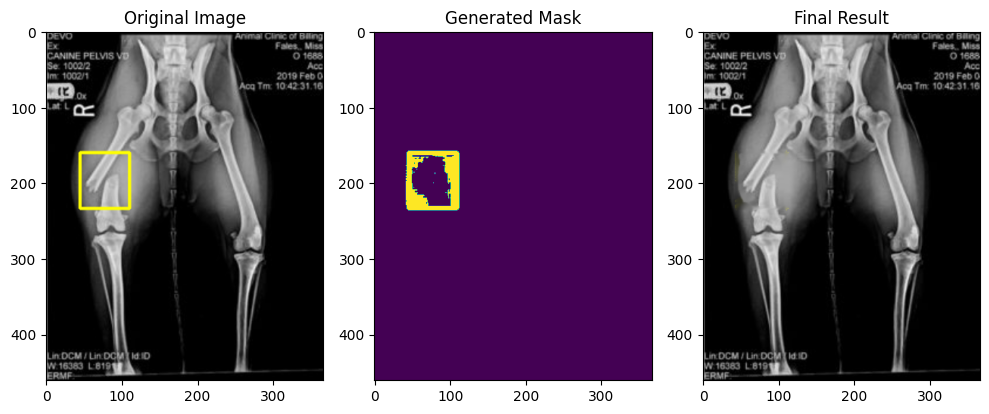

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/02- Picture2.png


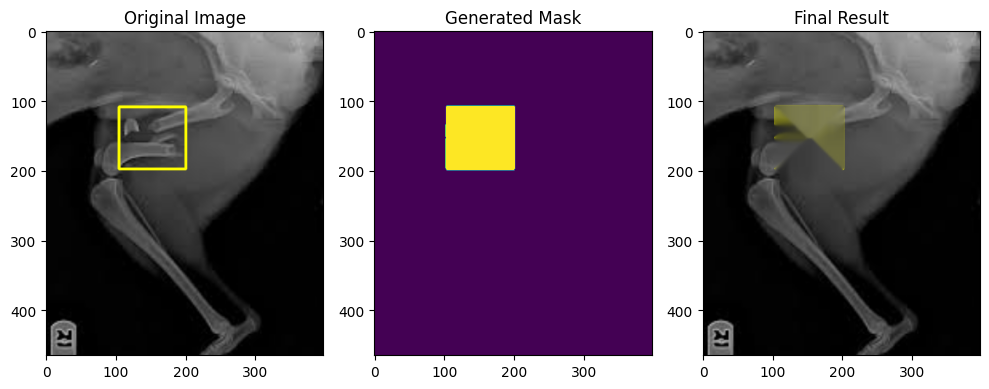

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/03- Picture3.png


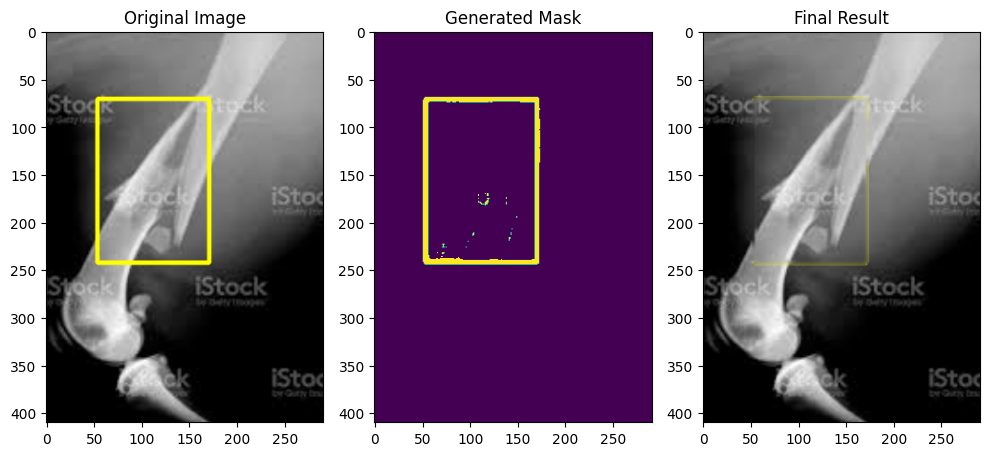

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/04- Picture4.png


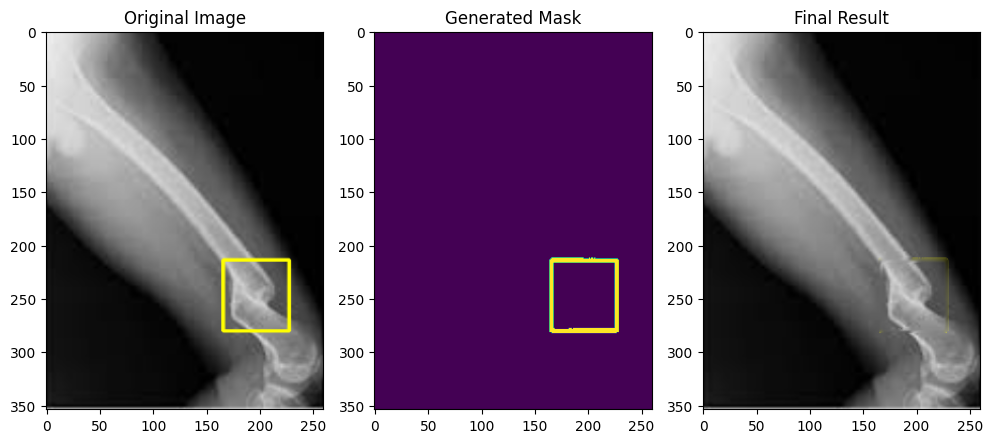

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/05- Picture5.png


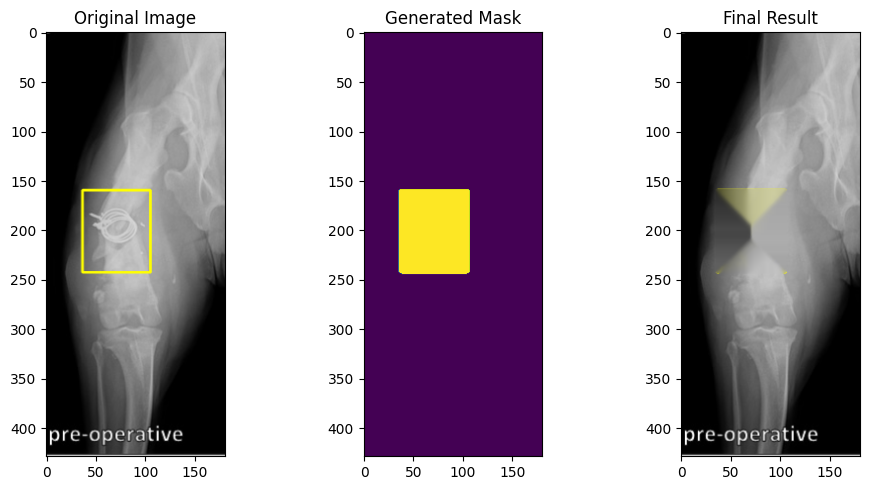

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/06- Picture6.1.png


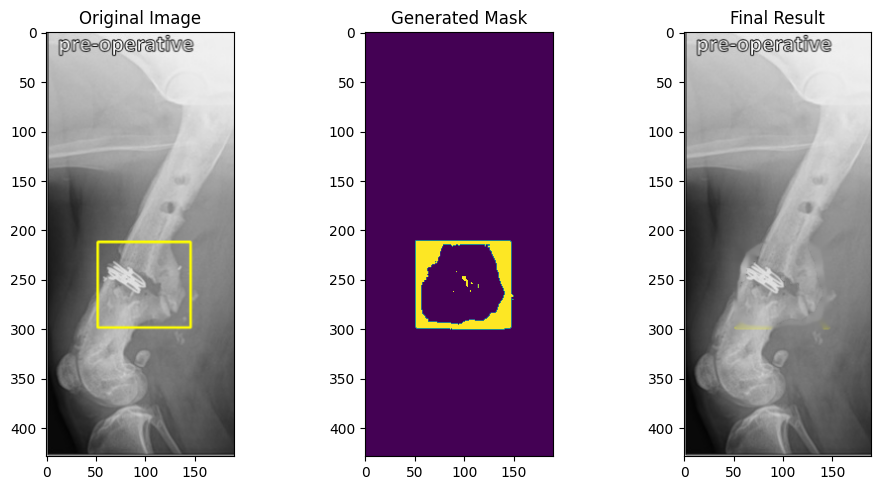

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/06- Picture6.2.png


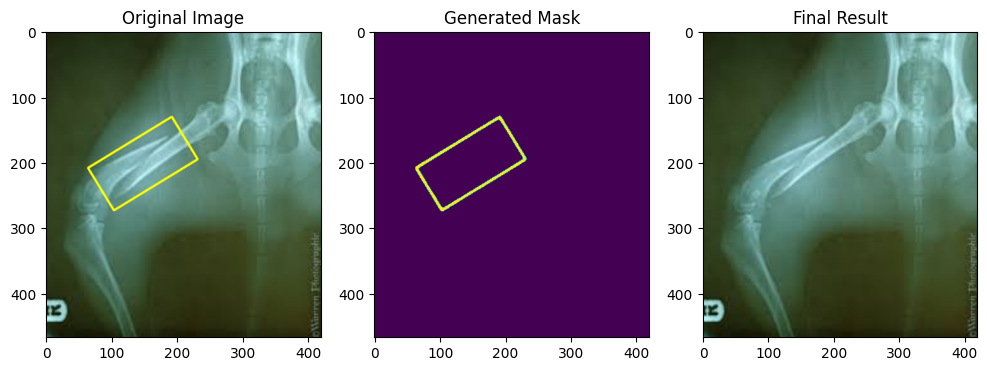

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/07- Picture7.png


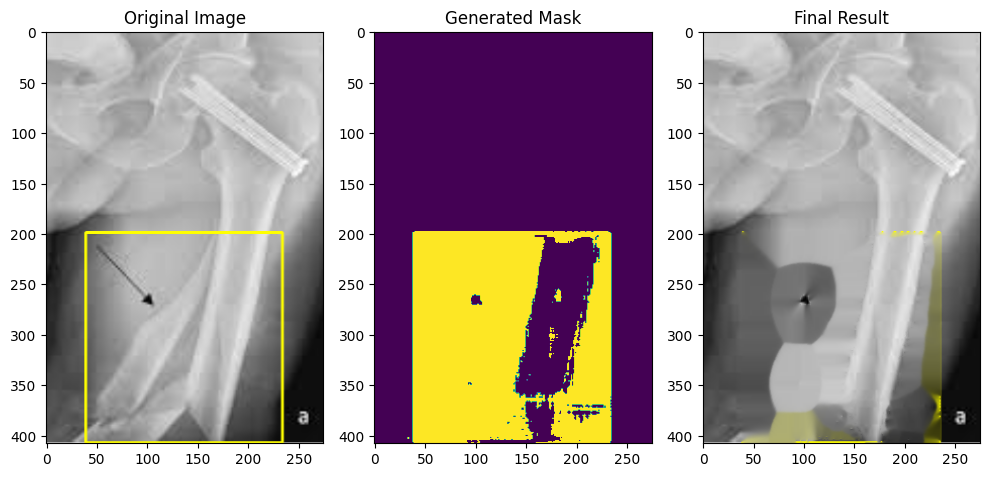

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/08- Picture8.1.png


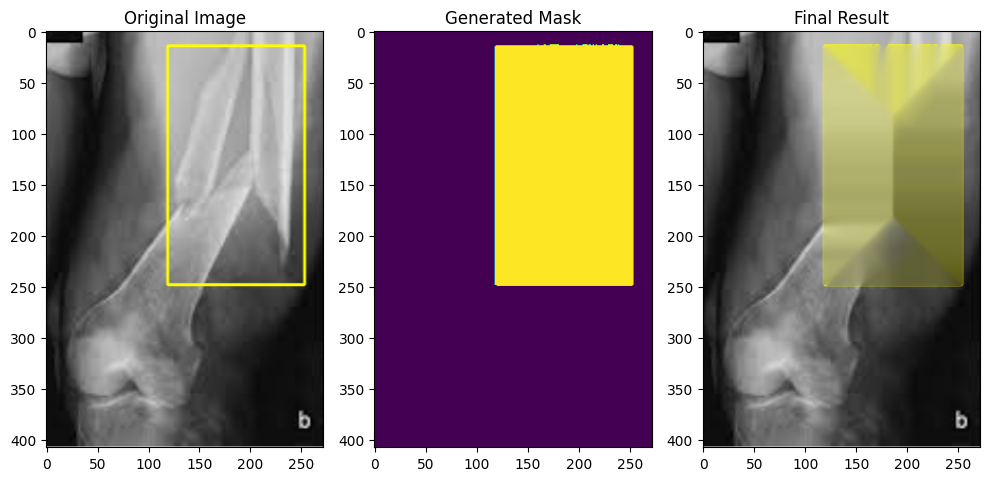

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/08- Picture8.png


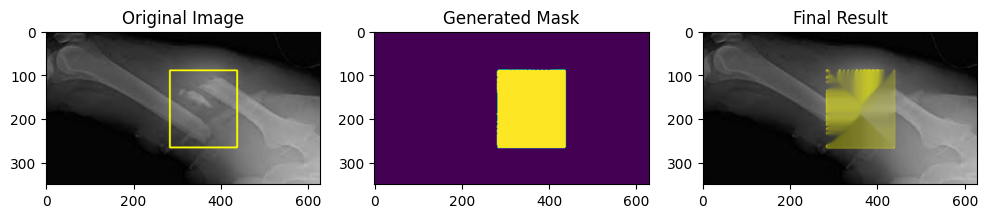

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/09- Picture9.png


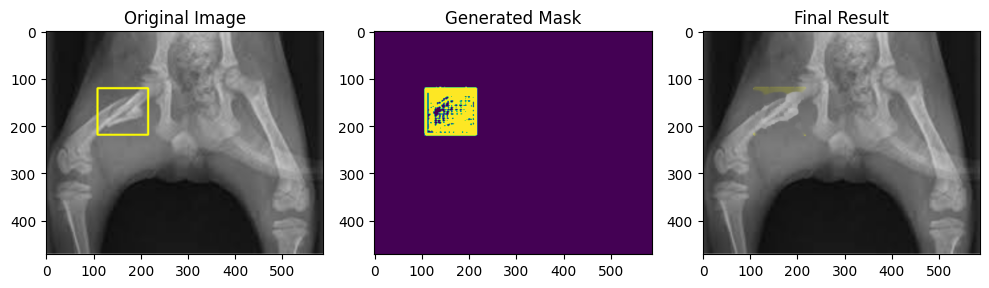

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/11- Picture11.png


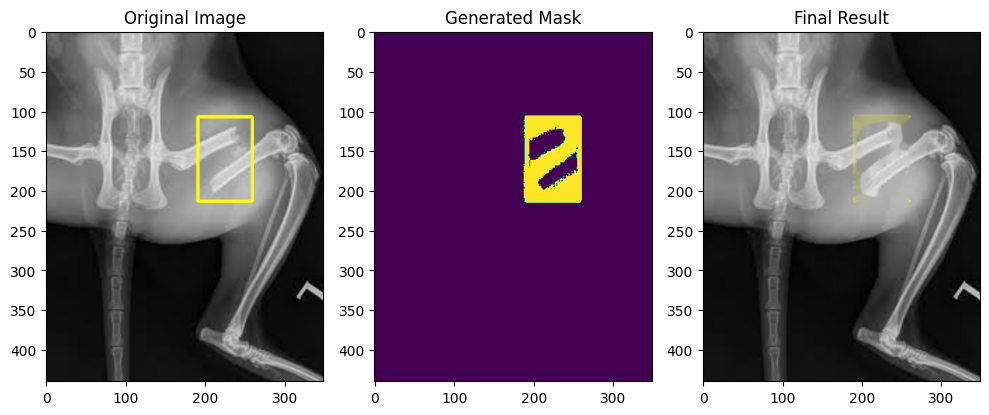

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/12- Picture12.png


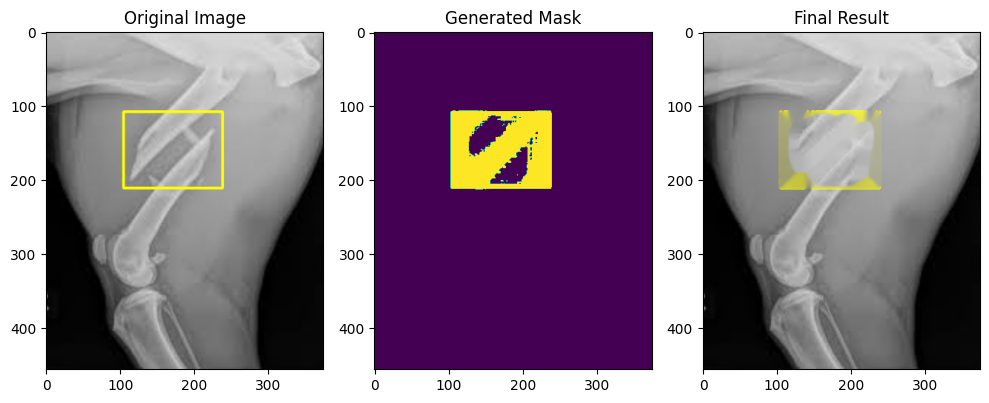

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/13- Picture13.png


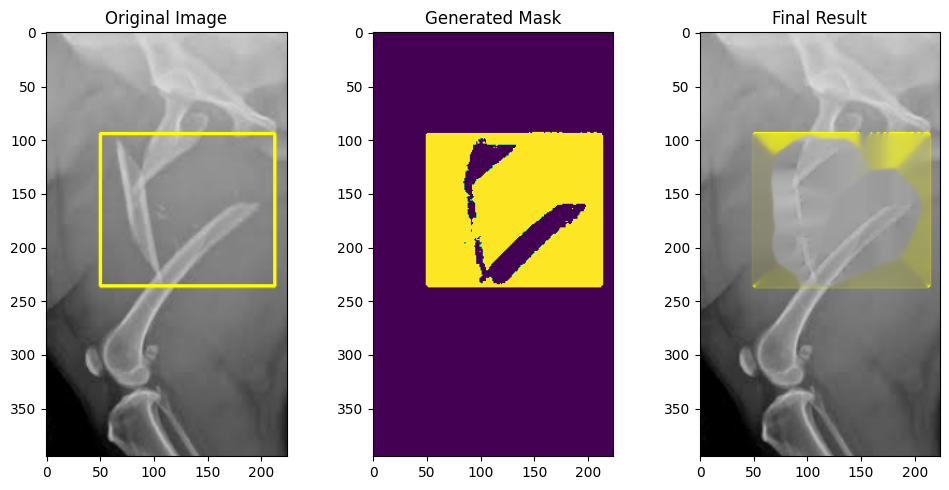

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/14- Picture14.png


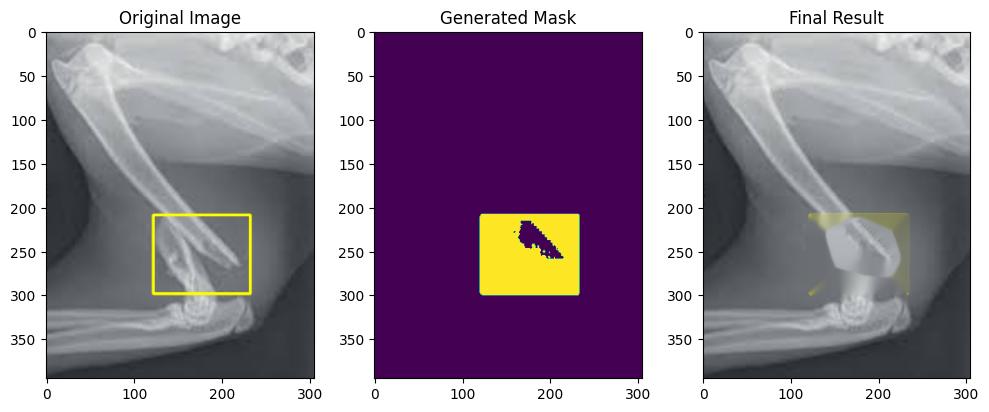

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/15- Picture15.png


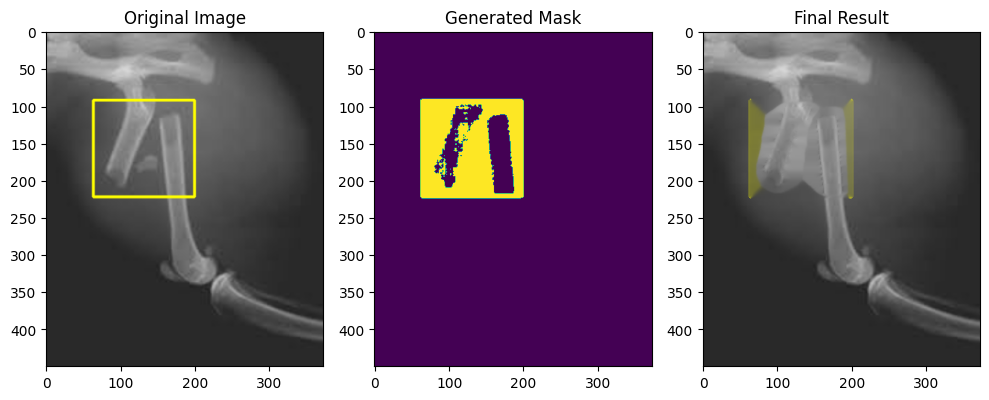

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/16- Picture16.png


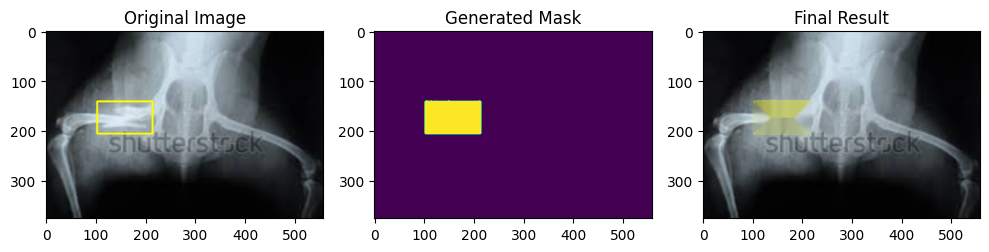

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/17- Picture17.png


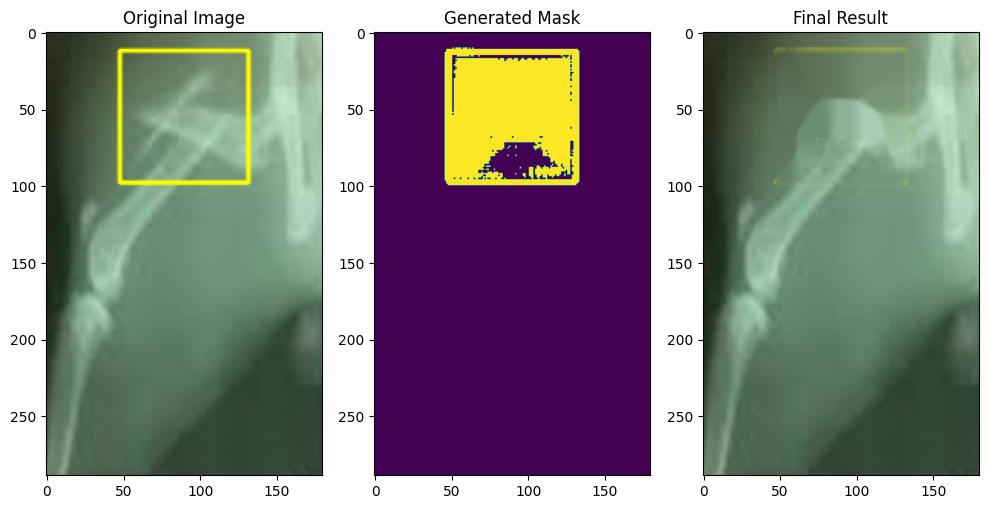

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/18- Picture18 .png


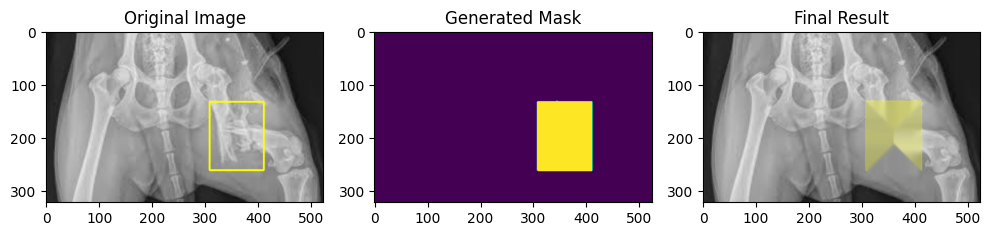

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/19- Picture19.png


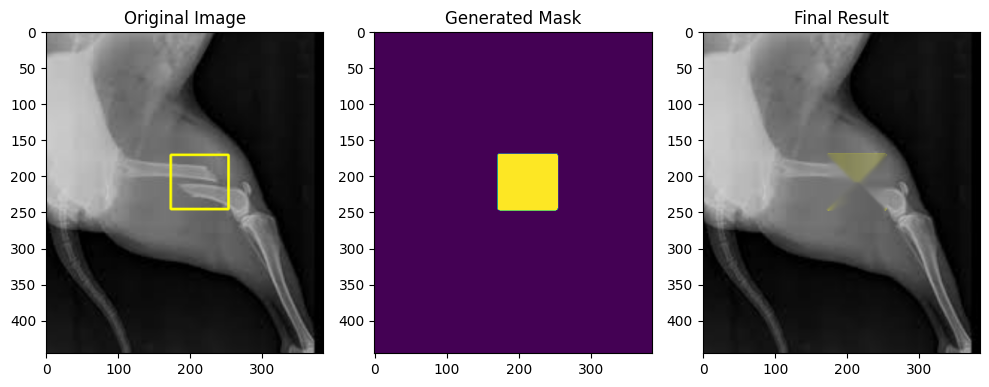

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/20- Picture20.png


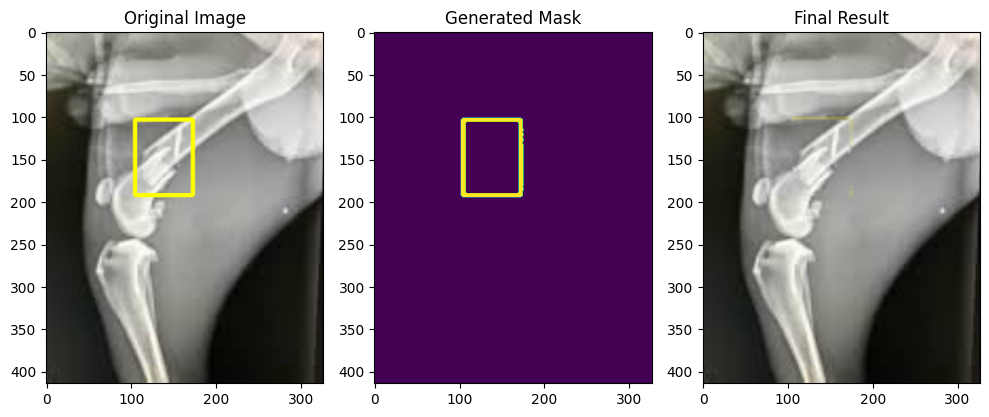

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/21- Picture21.png


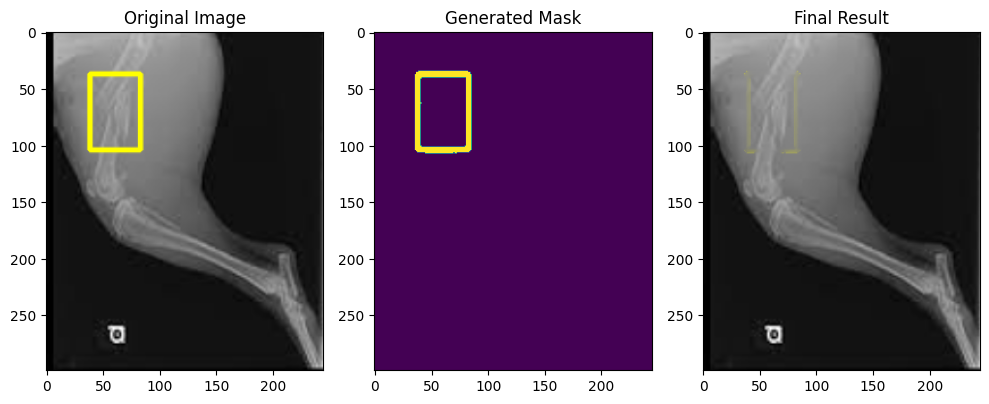

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/22- Picture22.1.png


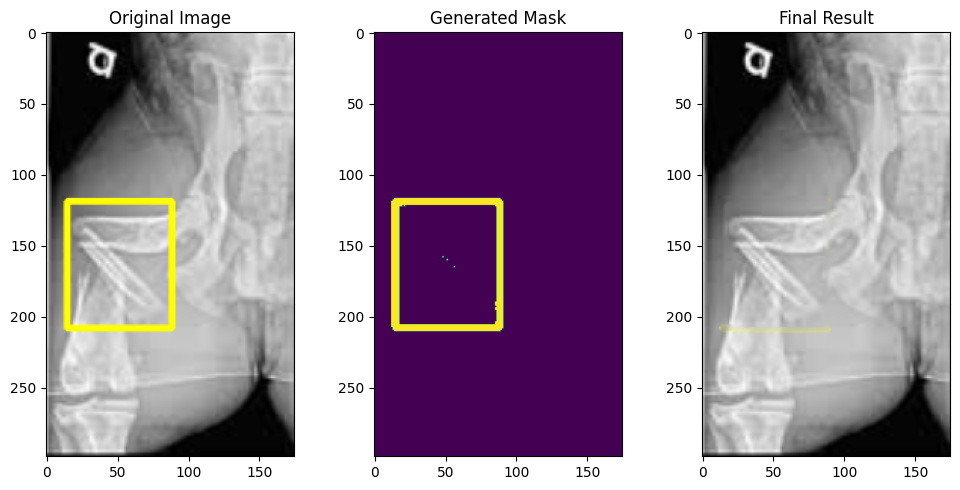

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/22- Picture22.png


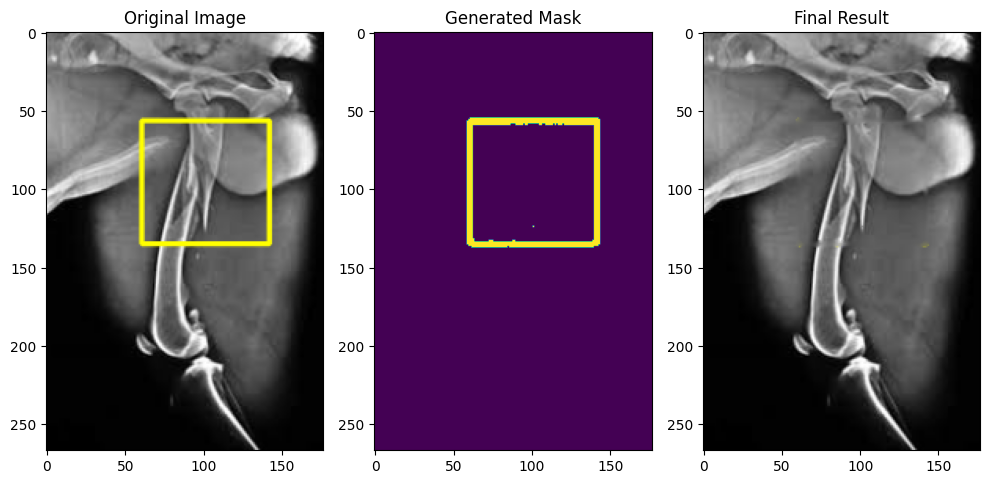

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/23- Picture23.1.png


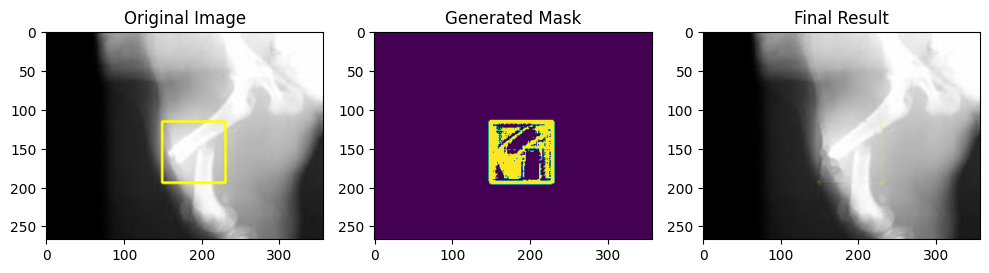

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/23- Picture23.png


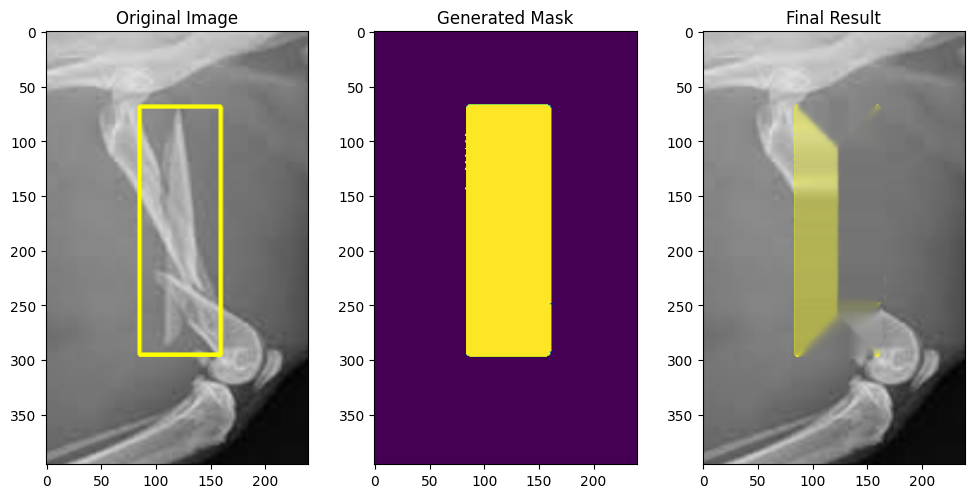

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/24- Picture24.png


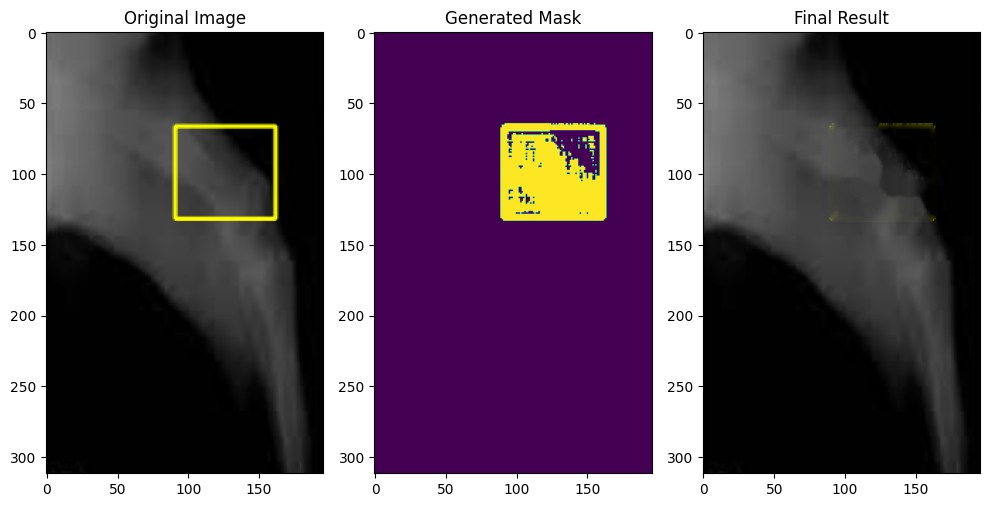

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/25 Picture 25.png


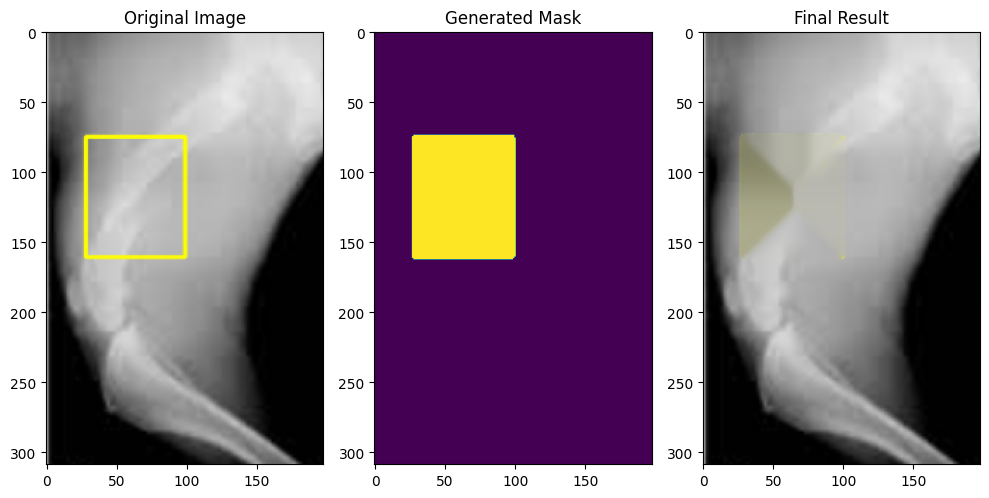

Successfully processed D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/00- Dogs Femur Fracture/Overriding/26-Picture 26.png


In [ ]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from segment_anything import SamPredictor, sam_model_registry
import os 

def debug_show(mask, image, bbox,result_image):
    """Visualization helper"""
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.title("Original Image")
    
    plt.subplot(1,3,2)
    plt.imshow(mask)
    plt.title("Generated Mask")
    
    plt.subplot(1,3,3)
    plt.imshow(cv2.rectangle(image.copy(), 
                            (bbox[0], bbox[1]),
                            (bbox[2], bbox[3]),
                            (255,0,0), 2))
    plt.title("Target Bounding Box")
    # Final Result After Removal
    plt.subplot(1,3,3)
    plt.imshow(result_image)
    plt.title("Final Result")
    
    plt.tight_layout()
    plt.show()

def detect_and_remove_yellow_box(image_path, output_path):
    # Load image properly with alpha channels
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    original = image.copy()
    
    # Improved HSV thresholding for yellow
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([22, 100, 100])
    upper_yellow = np.array([40, 255, 255])
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    
    # Morphological operations to clean mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Find largest contour with area check
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print("No yellow objects detected")
        return
    
    largest_contour = max(contours, key=cv2.contourArea)
    if cv2.contourArea(largest_contour) < 100:
        print("Yellow area too small")
        return
    
    # Get bounding box in SAM format (x_min, y_min, x_max, y_max)
    x, y, w, h = cv2.boundingRect(largest_contour)
    sam_box = np.array([x, y, x + w, y + h])
    
    # Initialize SAM with automatic device detection
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model_type = "vit_l" 
    checkpoint = "sam_vit_l_0b3195.pth"
    
    sam = sam_model_registry[model_type](checkpoint=checkpoint)
    sam.to(device)
    
    predictor = SamPredictor(sam)
    predictor.set_image(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Generate mask with SAM
    masks, scores, _ = predictor.predict(
        box=sam_box[None, :],
        multimask_output=False
    )
    
    if masks.size == 0:
        print("No masks generated")
        return
    
    # Select best mask
    best_mask = masks[0].astype(np.uint8) * 255
    segmented_preview = cv2.bitwise_and(image, image, mask=best_mask)
    # Debug visualization
    
    # Verify mask validity
    if np.sum(best_mask) < 100:
        print("Invalid mask generated")
        return
    
    # Improved inpainting with dynamic radius
    radius = max(3, int(min(w,h)*0.1))
    inpainted = cv2.inpaint(image, best_mask, radius, cv2.INPAINT_NS)
    debug_show(best_mask, cv2.cvtColor(image, cv2.COLOR_BGR2RGB), sam_box,cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB))
    
    # Save result
    cv2.imwrite(output_path, inpainted)
    print(f"Successfully processed {image_path}")

if __name__ == "__main__":
    Base_Folder = 'D:/Learning/University of sadat/Grade 4/Semester 2/06- Graduation Project/Coding/' 
    
    
    # for oblique images
    Oblique_INPUT_FOLDER = f'{Base_Folder}00- Dogs Femur Fracture/Oblique/'
    Oblique_OUTPUT_FOLDER = f'{Base_Folder}Segmented_DataSet/Oblique/'
    #### # for oblique images
    Overriding_INPUT_FOLDER = f'{Base_Folder}00- Dogs Femur Fracture/Overriding/'
    Overriding_OUTPUT_FOLDER = f'{Base_Folder}Segmented_DataSet/Overriding/'
    
    os.makedirs(Oblique_OUTPUT_FOLDER, exist_ok=True)
    os.makedirs(Overriding_OUTPUT_FOLDER, exist_ok=True)
    
    SAM_CHECKPOINT = f'{Base_Folder}01- Segmentation/sam_vit_l_0b3195.pth'
    for i in range(0,2):
        input_folder = Oblique_INPUT_FOLDER if i==0 else Overriding_INPUT_FOLDER
        output_folder = Oblique_OUTPUT_FOLDER if i==0 else Overriding_OUTPUT_FOLDER
        for file in os.listdir(input_folder):
            if file.endswith(".png"):
                detect_and_remove_yellow_box(input_folder + file, output_folder +file)